<a href="https://colab.research.google.com/github/mridula-kulkarni16/mridula/blob/main/stockmarket_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# New section

In [ ]:

import requests
from bs4 import BeautifulSoup

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [ ]:
import datetime
import calendar
import sklearn.metrics as metrics
import copy
import random

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
import profile

In [ ]:
import cProfile

In [ ]:
import scipy as sp

In [ ]:
features_df = pd.read_csv("features.csv")

In [ ]:
stores_df = pd.read_csv("stores.csv")

In [ ]:
train_df = pd.read_csv("trainn.csv")

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
dictonary = {1: 'Winter', 2: 'Winter' , 3: 'Spring', 4: 'Spring', 5: 'Spring', 6:'Summer' , 7: 'Summer', 8:'Summer', 9:'Fall', 10: 'Fall', 11:'Fall', 12:'Winter'}


In [ ]:
dictonary 

{1: 'Winter',
 2: 'Winter',
 3: 'Spring',
 4: 'Spring',
 5: 'Spring',
 6: 'Summer',
 7: 'Summer',
 8: 'Summer',
 9: 'Fall',
 10: 'Fall',
 11: 'Fall',
 12: 'Winter'}

In [ ]:
merge_df= train_df.merge(stores_df, on =['Store'], how ='left')
merge_df= merge_df.merge(features_df, on =['Store', 'Date'], how ='left')

In [ ]:
merge_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2/12/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2/19/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2/26/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,3/5/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,10/5/2012,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,10/12/2012,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,10/19/2012,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [ ]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2/12/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2/19/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2/26/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,3/5/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
d = copy.deepcopy(merge_df)

In [ ]:
d1 = d["Weekly_Sales"]

In [ ]:
print(d["Weekly_Sales"].describe())

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


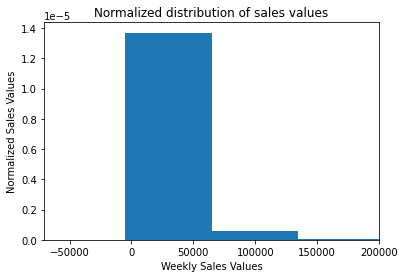

In [ ]:
x = np.concatenate((d1[d["Weekly_Sales"] < 0], d1[d["Weekly_Sales"] > 0]))

plt.hist(x, density=True)

plt.xlim([-70496, 200000])
plt.xlabel('Weekly Sales Values')
plt.ylabel('Normalized Sales Values')
plt.title('Normalized distribution of sales values')
plt.show()


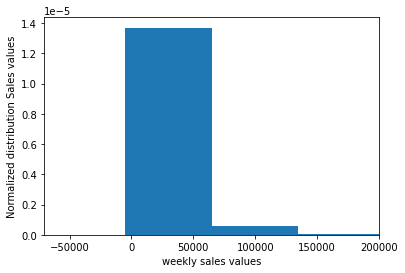

In [ ]:
x =np.concatenate((d1[d["Weekly_Sales"]< 0], d1[d["Weekly_Sales"] > 0]))
plt.hist(x,density=True)
plt.xlim([-70496, 200000])
plt.xlabel('weekly sales values')
plt.ylabel('Normalized distribution Sales values')
plt.show()

In [ ]:
merge_df['MarkDown1'] = merge_df['MarkDown1'].fillna(0)
merge_df['MarkDown2'] = merge_df['MarkDown2'].fillna(0)
merge_df['MarkDown3'] = merge_df['MarkDown3'].fillna(0)
merge_df['MarkDown4'] = merge_df['MarkDown4'].fillna(0)
merge_df['MarkDown5'] = merge_df['MarkDown5'].fillna(0)

In [ ]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2/12/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2/19/2010,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2/26/2010,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,3/5/2010,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [ ]:
merge_df['IsHoliday'] = merge_df['IsHoliday_x']
merge_df = merge_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

In [ ]:
merge_df

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2/5/2010,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2/12/2010,46039.49,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2/19/2010,41595.55,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2/26/2010,19403.54,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,3/5/2010,21827.90,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,10/5/2012,628.10,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,10/12/2012,1061.02,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,10/19/2012,760.01,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [ ]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2/5/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2/12/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2/19/2010,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2/26/2010,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,3/5/2010,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [ ]:
master_df['Week_Number'] = master_df['Date'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
master_df['Quarter'] = master_df['Date'].dt.quarter



In [ ]:
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

In [ ]:
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 +3)//3)).map(dictonary)

In [ ]:
master_df['Year'] = master_df['Date'].dt.year

In [ ]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format= '%m/%d/%Y')
merge_df['Week_Number'] = merge_df['Date'].dt.week
merge_df['Quarter'] = merge_df['Date'].dt.quarter
merge_df['Month'] = merge_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
merge_df['Season'] = (merge_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(dictonary)
merge_df["Year"] = merge_df["Date"].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Quarter,Month,Season,Year
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,1,Feb,Winter,2010
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,6,1,Feb,Winter,2010
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,7,1,Feb,Winter,2010
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,8,1,Feb,Winter,2010
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,9,1,Mar,Winter,2010


In [ ]:
merge_df=merge_df.sort_values(by=['Store', 'Dept', 'Year', 'Week_Number'], ascending=True)    

# Previous week sales
shifted_sales = merge_df.shift(1)
merge_df_new_var = merge_df.join(shifted_sales[['Store', 'Dept', 'Week_Number', 'Weekly_Sales', 'Year']], rsuffix='_Lag')
merge_df_new_var.loc[(merge_df_new_var.Dept != merge_df_new_var.Dept_Lag) |  (merge_df_new_var.Store != merge_df_new_var.Store_Lag), 'Weekly_Sales_Lag'] = -2



In [ ]:
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Quarter'], prefix='Quarter'))
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Season'], prefix='Season'))
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Store'], prefix='Store'))
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Dept'], prefix='Dept'))
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Type'], prefix='Type'))
merge_df_new_var = merge_df_new_var.join(pd.get_dummies(merge_df['Week_Number'], prefix='Week_Number'))

In [ ]:

merge_df_new_var = merge_df_new_var.dropna()

merge_df_new_var = merge_df_new_var.loc[merge_df_new_var['Weekly_Sales_Lag'] > 0]
merge_df_new_var = merge_df_new_var.loc[merge_df_new_var['Weekly_Sales'] > 0] 

In [ ]:
merge_df_new_var['MarkDown'] = merge_df_new_var['MarkDown1'] + merge_df_new_var['MarkDown2'] + merge_df_new_var['MarkDown3'] + merge_df_new_var['MarkDown4'] + merge_df_new_var['MarkDown5']
merge_df_new_var['MarkDown*Weekly_Sales_Lag'] = merge_df_new_var['MarkDown']*merge_df_new_var['Weekly_Sales_Lag']

In [ ]:
merge_df_new_var

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Quarter,Month,Season,Year,Store_Lag,Dept_Lag,Week_Number_Lag,Weekly_Sales_Lag,Year_Lag,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Spring,Season_Winter,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,Week_Number_15,Week_Number_16,Week_Number_17,Week_Number_18,Week_Number_19,Week_Number_20,Week_Number_21,Week_Number_22,Week_Number_23,Week_Number_24,Week_Number_25,Week_Number_26,Week_Number_27,Week_Number_28,Week_Number_29,Week_Number_30,Week_Number_31,Week_Number_32,Week_Number_33,Week_Number_34,Week_Number_35,Week_Number_36,Week_Number_37,Week_Number_38,Week_Number_39,Week_Number_40,Week_Number_41,Week_Number_42,Week_Number_43,Week_Number_44,Week_Number_45,Week_Number_46,Week_Number_47,Week_Number_48,Week_Number_49,Week_Number_50,Week_Number_51,Week_Number_52,MarkDown,MarkDown*Weekly_Sales_Lag
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,6,1,Feb,Winter,2010,1.0,1.0,5.0,24924.50,2010.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000000e+00
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,7,1,Feb,Winter,2010,1.0,1.0,6.0,46039.49,2010.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000000e+00
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,8,1,Feb,Winter,2010,1.0,1.0,7.0,41595.55,2010.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000000e+00
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,9,1,Mar,Winter,2010,1.0,1.0,8.0,19403.54,2010.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000000e+00
5,1,1,2010-03-12,21043.39,A,151315,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,False,10,1,Mar,Winter,2010,1.0,1.0,9.0,21827.90,2010.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,39,3,Sep,Spring,2012,45.0,98.0,38.0,467.30,2012.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9468.01,4.424401e+06
421566,45,98,2012-10-05,628.10,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,40,4,Oct,Spring,2012,45.0,98.0,39.0,508.37,2012.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9659.00,4.910346e+06
421567,45,98,2012-10-12,1061.02,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,41,4,Oct,Spring,2012,45.0,98.0,40.0,628.10,2012.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6554.03,4.116586e+06
421568,45,98,2012-10-19,760.01,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,42,4,Oct,Spring,2012,45.0,98.0,41.0,1061.02,2012.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3982.42,4.225427e+06


In [ ]:
print(merge_df_new_var[['MarkDown']])

        MarkDown
1           0.00
2           0.00
3           0.00
4           0.00
5           0.00
...          ...
421565   9468.01
421566   9659.00
421567   6554.03
421568   3982.42
421569   5247.26

[415976 rows x 1 columns]


In [ ]:
print(merge_df_new_var[['Store']])

        Store
1           1
2           1
3           1
4           1
5           1
...       ...
421565     45
421566     45
421567     45
421568     45
421569     45

[415976 rows x 1 columns]


In [ ]:
data_test = merge_df_new_var[merge_df_new_var.Year == 2012]
data_train = merge_df_new_var[merge_df_new_var.Year != 2012]

In [ ]:
features = list(merge_df_new_var)
for x in ('Quarter',
 'Month',
 'Season',
 'Year',
 'Store',
 'Dept',
 'Date',
 'Type',
 'Weekly_Sales',
 'Weekly_Sales_Lag'):
    features.remove(x)

In [ ]:
features

['Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'Week_Number',
 'Store_Lag',
 'Dept_Lag',
 'Week_Number_Lag',
 'Year_Lag',
 'Quarter_1',
 'Quarter_2',
 'Quarter_3',
 'Quarter_4',
 'Season_Spring',
 'Season_Winter',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45',
 'Dept_1',
 'Dept_2',
 'Dept_3',
 'Dept_4',
 'Dept_5',
 'Dept_6',
 'Dept_7',
 'Dept_8',
 'Dept_9',
 'Dept_1

In [ ]:
features = ['IsHoliday', 'Temperature', 'Weekly_Sales_Lag']#, 'Size', 'MarkDown5', 'master_df_new_var']
features.extend(merge_df_new_var.columns[merge_df_new_var.columns.str.startswith('Type')])
features.remove('Type')

equals_to_str = ""
for i in features:
    equals_to_str = equals_to_str + str(i) + " + "

equals_to_str = str('Weekly_Sales ~ ') + equals_to_str
equals_to_str = equals_to_str[:-3] 
equals_to_str_promotion = equals_to_str + "Markdown1"

In [ ]:
result_fullmodel = sm.ols(formula=equals_to_str, data = data_train).fit()
print("Model 1 without Promotion \n",result_fullmodel.summary())

Model 1 without Promotion 
                             OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 4.070e+05
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:31:28   Log-Likelihood:            -3.0143e+06
No. Observations:              289299   AIC:                         6.029e+06
Df Residuals:                  289293   BIC:                         6.029e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept 

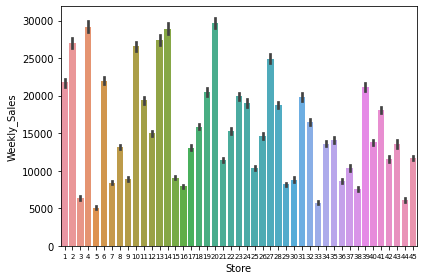

In [ ]:

ax= sns.barplot(x="Store", y="Weekly_Sales",  data=merge_df_new_var)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

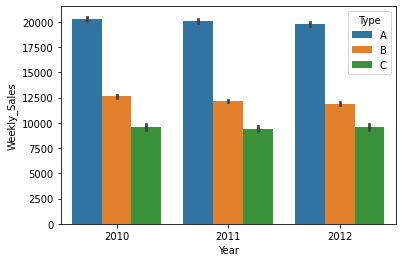

In [ ]:


sns.barplot(x="Year", y="Weekly_Sales", hue="Type", data=merge_df)

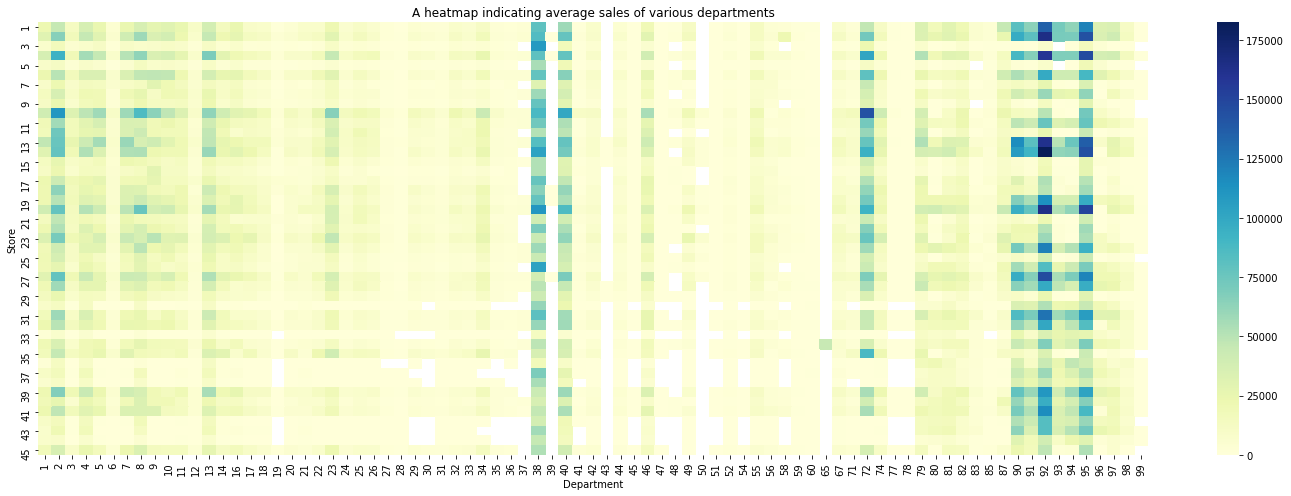

In [ ]:
heat_df= merge_df[['Store','Dept','Weekly_Sales']]
heat_map=heat_df.groupby(['Store','Dept']).mean()
heat_map.reset_index(inplace=True)
heat_map=heat_map.pivot('Store','Dept','Weekly_Sales')
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(heat_map, cmap="YlGnBu", ax=ax)
plt.xlabel('Department')
plt.ylabel('Store')
plt.title('A heatmap indicating average sales of various departments')
plt.tight_layout()
plt.show()

In [ ]:
train_df.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
dtype: bool

In [ ]:
features_df.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
dtype: bool

In [90]:
test_df = pd.read_csv("test.csv")

In [91]:
df = pd.concat([features_df,train_df,test_df],axis=0)

In [92]:
df.shape

(568879, 16)

In [ ]:
df.head(8191)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1.0,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096,8.106,False,NaN,NaN,NaN,NaN
1,1.0,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242,8.106,True,NaN,NaN,NaN,NaN
2,1.0,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289,8.106,False,NaN,NaN,NaN,NaN
3,1.0,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.32,8.106,False,NaN,NaN,NaN,NaN
4,1.0,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.35,8.106,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,45.0,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN,NaN
8187,45.0,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN,NaN
8188,45.0,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN,NaN
8189,45.0,7/26/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,NaN,NaN,NaN,NaN


In [93]:
df.dropna(axis=0, how="all", inplace=True)
#Removing all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)

In [94]:

df.shape

(568879, 16)

In [95]:
df_filll =df.fillna(0)

In [96]:
df_filll =df.fillna(0)

In [97]:
df_filll.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2/5/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0
1,1,2/12/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0
2,1,2/19/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0
3,1,2/26/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0
4,1,3/5/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0


In [98]:
df_filll.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000
mean,22.215719,15.537813,0.871333,688.857645,236.471856,130.026405,287.855195,437.683247,44.169945,2.047438,43.610293,11842.973615,33435.654202
std,12.790144,27.913979,1.492255,3359.101893,2637.071014,2938.748925,2084.502685,2443.788283,77.520731,3.598425,30.721473,20766.402134,66042.244775
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3370.120000,0.000000
75%,33.000000,24.690000,2.625000,0.000000,0.000000,0.000000,0.000000,0.000000,126.208548,4.607000,72.000000,14367.785000,0.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000,219622.000000


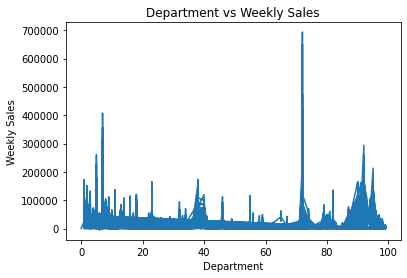

In [99]:
import matplotlib.pyplot as plt
#Weekly sales by Department
x=df_filll['Dept']
y=df_filll['Weekly_Sales']
plt.title("Department vs Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Weekly Sales")
plt.plot(x,y)
plt.show()

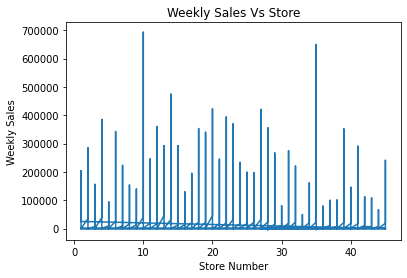

In [100]:
x=df_filll['Store']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales Vs Store')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()


In [101]:
df_filll.Date=pd.to_datetime(df_filll.Date)
df_filll['Year']=df_filll.Date.dt.year
df_filll['Week']=df_filll.Date.dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:

df_filll['Month']=df_filll.Date.dt.month

In [103]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,11
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,3
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,1
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,6


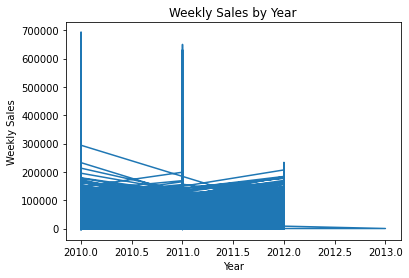

In [104]:

x=df_filll['Year']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

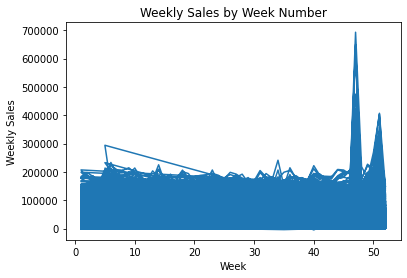

In [105]:
x=df_filll['Week']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales by Week Number')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

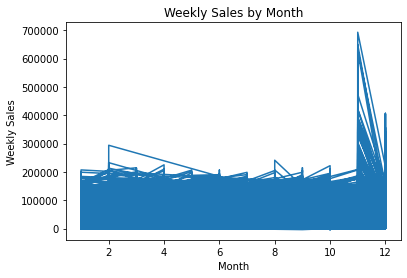

In [106]:

x=df_filll['Month']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

In [107]:
df_filll['IsHoliday'].value_counts()

False    528791
True      40088
Name: IsHoliday, dtype: int64

In [108]:

#Converting true or false to 0 and 1
df_filll['IsHoliday01'] = df_filll['IsHoliday'].apply(lambda x: '1' if x == True else '0')

In [109]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,11,0
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,3,0
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,1,0
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,6,0


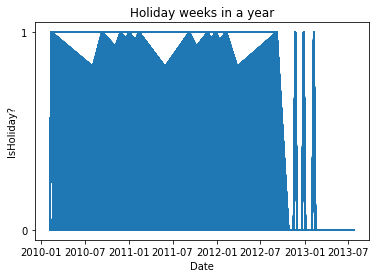

In [110]:

x=df_filll['Date']
y=df_filll['IsHoliday01']
plt.title('Holiday weeks in a year')
plt.xlabel('Date')
plt.ylabel('IsHoliday?')
plt.plot(x,y)
plt.show()

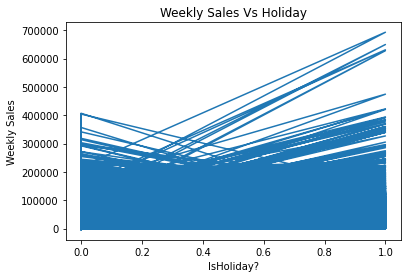

In [111]:
x=df_filll['IsHoliday']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales Vs Holiday')
plt.xlabel('IsHoliday?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

<function matplotlib.pyplot.show>

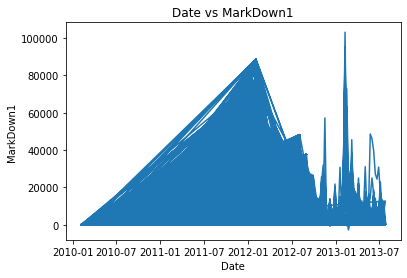

In [112]:

y1=df_filll['MarkDown1']
x=df_filll['Date']
plt.title("Date vs MarkDown1")
plt.xlabel("Date")
plt.ylabel("MarkDown1")
plt.plot(x,y1)
plt.show

<function matplotlib.pyplot.show>

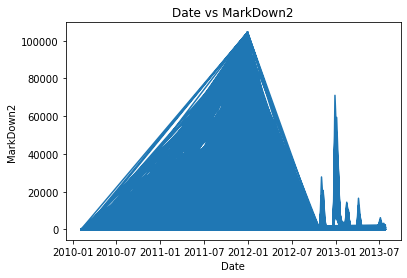

In [113]:

y1=df_filll['MarkDown2']
x=df_filll['Date']
plt.title("Date vs MarkDown2")
plt.xlabel("Date")
plt.ylabel("MarkDown2")
plt.plot(x,y1)
plt.show

<function matplotlib.pyplot.show>

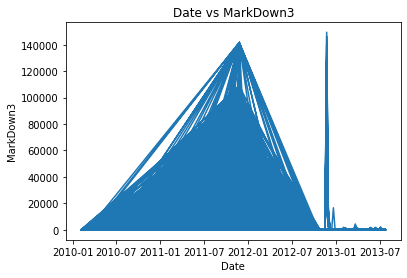

In [114]:

y1=df_filll['MarkDown3']
x=df_filll['Date']
plt.title("Date vs MarkDown3")
plt.xlabel("Date")
plt.ylabel("MarkDown3")
plt.plot(x,y1)
plt.show

<function matplotlib.pyplot.show>

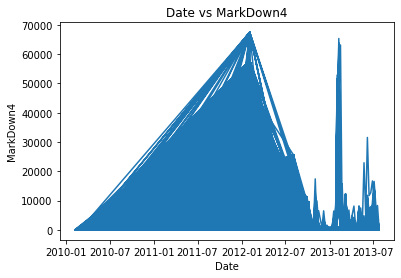

In [115]:

y1=df_filll['MarkDown4']
x=df_filll['Date']
plt.title("Date vs MarkDown4")
plt.xlabel("Date")
plt.ylabel("MarkDown4")
plt.plot(x,y1)
plt.show

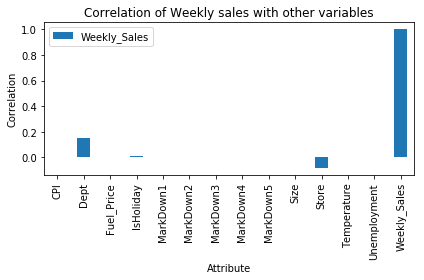

In [ ]:
df_corr = df.corr()
ax = df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

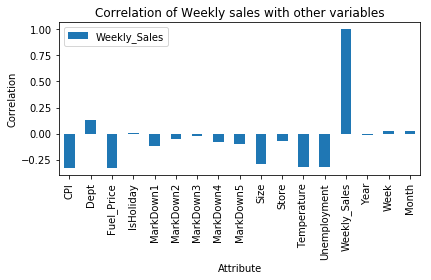

In [ ]:
df_corr = df_fill.corr()
ax = df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

In [116]:

df_Weekly_Sales_mean = df.Weekly_Sales.fillna(df['Weekly_Sales'].mean())

In [117]:
df_Weekly_Sales_mean

0         15981.258123
1         15981.258123
2         15981.258123
3         15981.258123
4         15981.258123
              ...     
139114    15981.258123
139115    15981.258123
139116    15981.258123
139117    15981.258123
139118    15981.258123
Name: Weekly_Sales, Length: 568879, dtype: float64

In [118]:
df_filll.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0


In [119]:

df_filll['Weekly_Sales_mean']=df_Weekly_Sales_mean

In [120]:
df_filll.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0,15981.258123
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1,15981.258123
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0,15981.258123
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0,15981.258123
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0,15981.258123


In [121]:
df_filll.loc[df_filll['Weekly_Sales_mean'] >300000]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean
30474,4,2011-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,7.0,318422.01,0,0.0,2011,51,12,0,318422.01
37201,4,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,381072.11,0,0.0,2010,47,11,1,381072.11
37253,4,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,385051.04,0,0.0,2011,47,11,1,385051.04
56417,6,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,342578.65,0,0.0,2010,47,11,1,342578.65
56469,6,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,326866.60,0,0.0,2011,47,11,1,326866.60
88428,10,2010-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,7.0,406988.63,0,0.0,2010,51,12,0,406988.63
88480,10,2011-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,7.0,341308.00,0,0.0,2011,51,12,0,341308.00
95373,10,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,693099.36,0,0.0,2010,47,11,1,693099.36
95377,10,2010-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,72.0,404245.03,0,0.0,2010,51,12,0,404245.03
95425,10,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,72.0,630999.19,0,0.0,2011,47,11,1,630999.19


In [122]:
df_filll.loc[df_filll['Weekly_Sales_mean'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

In [123]:

df_filll = df_filll.assign(md1_present = df_filll.MarkDown1.notnull())
df_filll = df_filll.assign(md2_present = df_filll.MarkDown2.notnull())
df_filll = df_filll.assign(md3_present = df_filll.MarkDown3.notnull())
df_filll = df_filll.assign(md4_present = df_filll.MarkDown4.notnull())
df_filll = df_filll.assign(md5_present = df_filll.MarkDown5.notnull())

In [124]:
store_dummies = pd.get_dummies(df_filll['Store'])
dept_dummies = pd.get_dummies(df_filll['Dept'])
holiday_dummies = pd.get_dummies(df_filll['IsHoliday'])

In [125]:


df_filll['Month'] = 'Month_' + df_filll['Month'].map(str)

In [126]:
Month_dummies = pd.get_dummies(df_filll['Month'] )

In [127]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,Month_11,0,15981.258123,True,True,True,True,True
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,Month_3,0,15981.258123,True,True,True,True,True
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,Month_1,0,15981.258123,True,True,True,True,True
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,Month_6,0,15981.258123,True,True,True,True,True


In [128]:
df_filll.values

array([[1, Timestamp('2010-02-05 00:00:00'), 42.31, ..., True, True,
        True],
       [1, Timestamp('2010-02-12 00:00:00'), 38.51, ..., True, True,
        True],
       [1, Timestamp('2010-02-19 00:00:00'), 39.93, ..., True, True,
        True],
       ...,
       [30, Timestamp('2011-01-28 00:00:00'), 44.04, ..., True, True,
        True],
       [32, Timestamp('2012-06-08 00:00:00'), 71.14, ..., True, True,
        True],
       [27, Timestamp('2012-04-13 00:00:00'), 52.22, ..., True, True,
        True]], dtype=object)

In [129]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,Month_11,0,15981.258123,True,True,True,True,True
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,Month_3,0,15981.258123,True,True,True,True,True
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,Month_1,0,15981.258123,True,True,True,True,True
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,Month_6,0,15981.258123,True,True,True,True,True


In [130]:
from datetime import datetime
from datetime import timedelta

In [131]:

df_filll['Black_Friday']=np.where((df_filll['Date']==datetime(2010, 11, 26).date()) | (df_filll['Date']==datetime(2011,11,25).date()), 'yes', 'no')
print((len(df_filll.loc[df_filll['Black_Friday'] == 'yes'])/len(df_filll))*100," % of rows are Black Friday")

0.0  % of rows are Black Friday


In [132]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True,no
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True,no
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True,no
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True,no
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,Month_11,0,15981.258123,True,True,True,True,True,no
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,Month_3,0,15981.258123,True,True,True,True,True,no
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,Month_1,0,15981.258123,True,True,True,True,True,no
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,Month_6,0,15981.258123,True,True,True,True,True,no


In [ ]:

df_filll['Pre_christmas']=np.where((df_filll['Date']==datetime(2010, 12, 23).date()) | (df_filll['Date']==datetime(2010,12,24).date()) | (df_filll['Date']==datetime(2011, 12, 23).date()) | (df_filll['Date']==datetime(2011,12,24).date()), 'yes', 'no')
print((len(df_filll.loc[df_filll['Pre_christmas'] == 'yes'])/len(df_filll))*100," % of rows are Pre Christmas")

In [134]:

#Creating dummies for Black friday and pre christmas
df_filll['Black_Friday'] = 'Black_Friday_' + df_filll['Black_Friday'].map(str)
df_filll['Pre_christmas'] = 'Pre_christmas_' + df_filll['Pre_christmas'].map(str)


In [135]:
Black_Friday_dummies = pd.get_dummies(df_filll['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df_filll['Pre_christmas'] )

In [136]:

df_filll.head(1000)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,2011-09-23,78.49,3.467,0.0,0.0,0.0,0.0,0.0,217.918847,6.925,False,0.0,0.0,0,0.0,2011,38,Month_9,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
996,6,2011-09-30,82.51,3.355,0.0,0.0,0.0,0.0,0.0,218.257944,6.925,False,0.0,0.0,0,0.0,2011,39,Month_9,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
997,6,2011-10-07,74.10,3.285,0.0,0.0,0.0,0.0,0.0,218.597040,6.551,False,0.0,0.0,0,0.0,2011,40,Month_10,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
998,6,2011-10-14,71.24,3.274,0.0,0.0,0.0,0.0,0.0,218.910984,6.551,False,0.0,0.0,0,0.0,2011,41,Month_10,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no


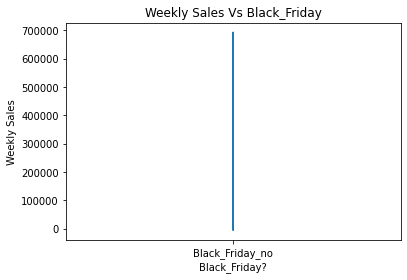

In [137]:
x=df_filll['Black_Friday']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales Vs Black_Friday')
plt.xlabel('Black_Friday?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

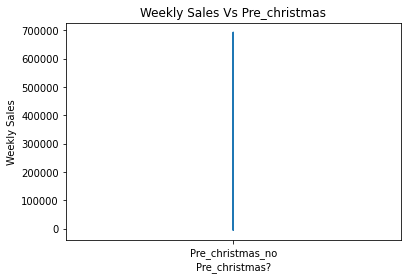

In [138]:
x=df_filll['Pre_christmas']
y=df_filll['Weekly_Sales']
plt.title('Weekly Sales Vs Pre_christmas')
plt.xlabel('Pre_christmas?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

In [139]:
df_filll.head(1000)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,2011-09-23,78.49,3.467,0.0,0.0,0.0,0.0,0.0,217.918847,6.925,False,0.0,0.0,0,0.0,2011,38,Month_9,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
996,6,2011-09-30,82.51,3.355,0.0,0.0,0.0,0.0,0.0,218.257944,6.925,False,0.0,0.0,0,0.0,2011,39,Month_9,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
997,6,2011-10-07,74.10,3.285,0.0,0.0,0.0,0.0,0.0,218.597040,6.551,False,0.0,0.0,0,0.0,2011,40,Month_10,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
998,6,2011-10-14,71.24,3.274,0.0,0.0,0.0,0.0,0.0,218.910984,6.551,False,0.0,0.0,0,0.0,2011,41,Month_10,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no


In [140]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,Month_11,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,Month_3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,Month_1,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,Month_6,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no


In [141]:
d = copy.deepcopy(df_filll)

In [142]:
d1 = d["Weekly_Sales"]

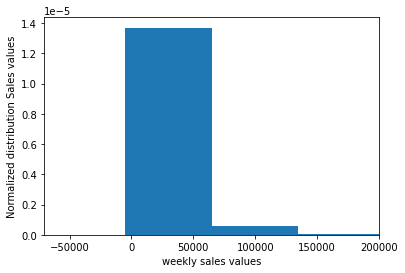

In [143]:
x =np.concatenate((d1[d["Weekly_Sales"]< 0], d1[d["Weekly_Sales"] > 0]))
plt.hist(x,density=True)
plt.xlim([-70496, 200000])
plt.xlabel('weekly sales values')
plt.ylabel('Normalized distribution Sales values')
plt.show()

In [144]:


df_Weekly_Sales_median = df.Weekly_Sales.fillna(df['Weekly_Sales'].median())


In [145]:

df_filll['Weekly_Sales_median']= df_Weekly_Sales_median

In [146]:
df_filll.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas,Weekly_Sales_median
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,Month_2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,Month_2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,Month_3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03


In [147]:
df_filll.Date=pd.to_datetime(df_filll.Date)
df_filll['Year']=df_filll.Date.dt.year
df_filll['Week']=df_filll.Date.dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
df_filll['Month']=df_filll.Date.dt.month

In [149]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas,Weekly_Sales_median
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,11,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,1,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,6,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03


In [150]:
 print(df_filll['Month'])

0          2
1          2
2          2
3          2
4          3
          ..
139114    11
139115     3
139116     1
139117     6
139118     4
Name: Month, Length: 568879, dtype: int64


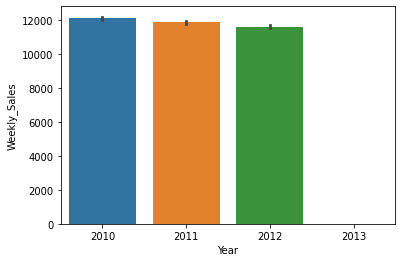

In [151]:
sns.barplot(x="Year", y="Weekly_Sales", data=df_filll)

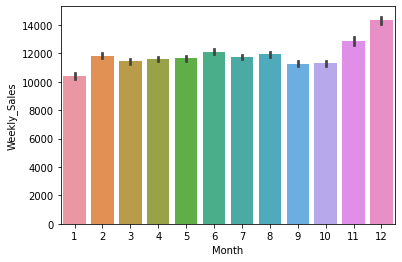

In [152]:
sns.barplot(x="Month", y="Weekly_Sales", data=df_filll)

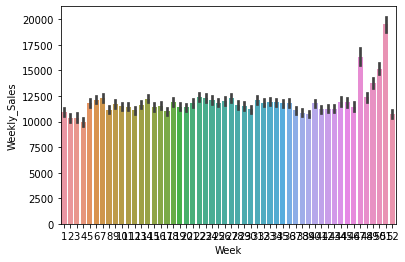

In [153]:
sns.barplot(x="Week", y="Weekly_Sales", data=df_filll)

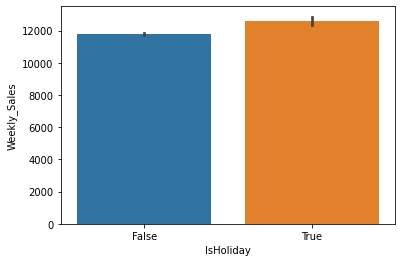

In [154]:
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=df_filll)

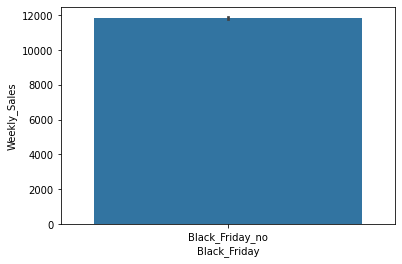

In [155]:
sns.barplot(x="Black_Friday", y="Weekly_Sales", data=df_filll)

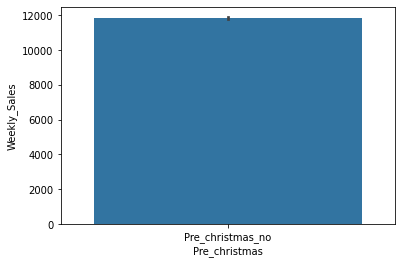

In [156]:
sns.barplot(x="Pre_christmas", y="Weekly_Sales", data=df_filll)

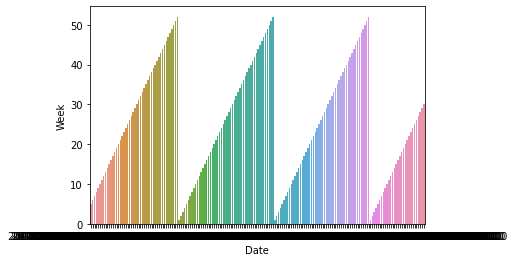

In [157]:
sns.barplot(x="Date", y="Week", data=df_filll)

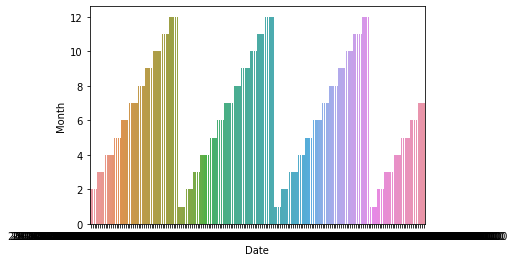

In [158]:
sns.barplot(x="Date", y="Month", data=df_filll)

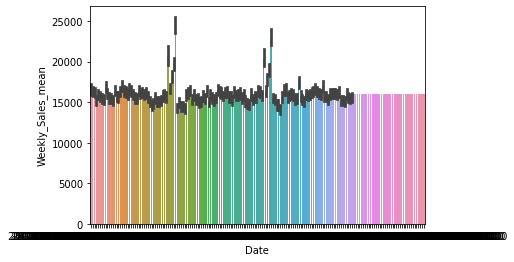

In [159]:
 sns.barplot(x="Date", y="Weekly_Sales_mean", data=df_filll)

In [161]:
datanew = np.random.randint(5111 , 7991 , size=30)
df1 = pd.DataFrame(datanew, columns= ['Montly_Sales']).astype(float)

In [162]:
df1

,Montly_Sales
0,6072.0
1,5402.0
2,5454.0
3,5884.0
4,7925.0
5,5941.0
6,5500.0
7,5135.0
8,7167.0
9,5963.0


In [163]:
df_filll['MonthlySales'] = df1

In [164]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas,Weekly_Sales_median,MonthlySales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,6072.0
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5402.0
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5454.0
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5884.0
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,7925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,11,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,1,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,6,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN


In [165]:
df_filll['MonthlySales'].fillna(0)

0         6072.0
1         5402.0
2         5454.0
3         5884.0
4         7925.0
           ...  
139114       0.0
139115       0.0
139116       0.0
139117       0.0
139118       0.0
Name: MonthlySales, Length: 568879, dtype: float64

In [166]:
df_filll

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Week,Month,IsHoliday01,Weekly_Sales_mean,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas,Weekly_Sales_median,MonthlySales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,0.0,0.0,0,0.0,2010,5,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,6072.0
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,0.0,0.0,0,0.0,2010,6,2,1,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5402.0
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,0.0,0.0,0,0.0,2010,7,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5454.0
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,0.0,0.0,0,0.0,2010,8,2,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,5884.0
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,0.0,0.0,0,0.0,2010,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,7925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139114,33,2011-11-18,63.35,3.669,86.59,6.00,0.00,0.00,3220.86,129.826833,8.010,False,91.0,0.0,A,39690.0,2011,46,11,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139115,13,2012-03-02,32.36,3.242,25204.67,2436.75,167.88,16066.76,7289.69,130.645793,6.104,False,85.0,0.0,A,219622.0,2012,9,3,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139116,30,2011-01-28,44.04,3.010,0.00,0.00,0.00,0.00,0.00,211.855267,8.028,False,91.0,0.0,C,42988.0,2011,4,1,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN
139117,32,2012-06-08,71.14,3.741,8483.84,361.80,77.99,1640.00,6841.59,197.655186,8.090,False,32.0,0.0,A,203007.0,2012,23,6,0,15981.258123,True,True,True,True,True,Black_Friday_no,Pre_christmas_no,7612.03,NaN


In [167]:
df_filll.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size,Year,Week,Month,Weekly_Sales_mean,Weekly_Sales_median,MonthlySales
count,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,568879.000000,90.000000
mean,22.215719,15.537813,0.871333,688.857645,236.471856,130.026405,287.855195,437.683247,44.169945,2.047438,43.610293,11842.973615,33435.654202,2010.975151,25.814750,6.446392,15981.258123,13814.079118,6401.333333
std,12.790144,27.913979,1.492255,3359.101893,2637.071014,2938.748925,2084.502685,2443.788283,77.520731,3.598425,30.721473,20766.402134,66042.244775,0.802445,14.161632,3.245183,19550.799912,19891.574887,742.305080
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000,0.000000,2010.000000,1.000000,1.000000,-4988.940000,-4988.940000,5135.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,2010.000000,14.000000,4.000000,3598.805000,3598.805000,5884.000000
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3370.120000,0.000000,2011.000000,26.000000,6.000000,15072.520000,7612.030000,6315.000000
75%,33.000000,24.690000,2.625000,0.000000,0.000000,0.000000,0.000000,0.000000,126.208548,4.607000,72.000000,14367.785000,0.000000,2012.000000,38.000000,9.000000,15981.258123,14367.785000,6980.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000,219622.000000,2013.000000,52.000000,12.000000,693099.360000,693099.360000,7925.000000


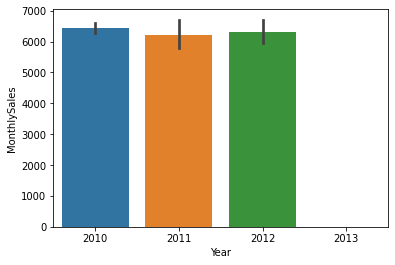

In [168]:
 sns.barplot(x="Year", y="MonthlySales", data=df_filll)

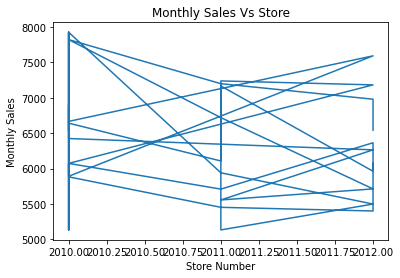

In [170]:
x=df_filll['Year']
y=df_filll['MonthlySales']
plt.title('Monthly Sales Vs Store')
plt.xlabel('Store Number')
plt.ylabel('Monthly Sales')
plt.plot(x,y)
plt.show()

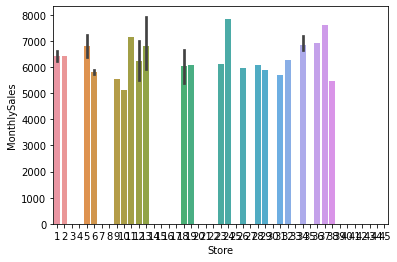

In [171]:
 sns.barplot(x="Store", y="MonthlySales", data=df_filll)

In [180]:
D = df_filll.iloc[: ,[16]].head()

In [181]:
D

,Year
0,2010
1,2010
2,2010
3,2010
4,2010


In [207]:
D1 = df_filll.iloc[: ,[-1]].head()

In [208]:
D1




,MonthlySales
0,6072.0
1,5402.0
2,5454.0
3,5884.0
4,7925.0


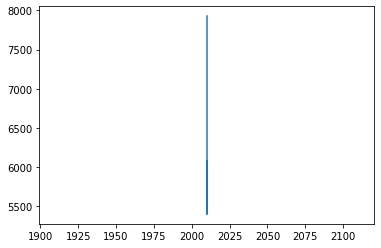

In [209]:
plt.plot(D, D1)

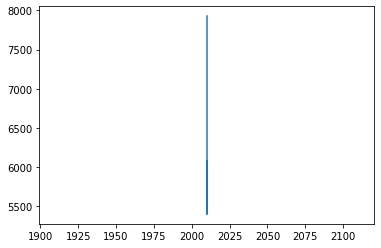

In [211]:
plt.plot(D , D1)
plt.show(block= True)

In [224]:
from pandas import*
pv = pivot_table(df_filll , index = ['Date'], columns= ['Year'], values= ['MonthlySales'])

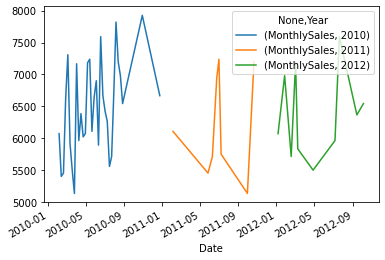

In [225]:
pv.plot()

# New Section